In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

C:\rahul\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('car.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [8]:
df.horsepower.fillna(df.horsepower.mean(),inplace=True)

In [9]:
df.horsepower.unique()

array([130.        , 165.        , 150.        , 140.        ,
       198.        , 220.        , 215.        , 225.        ,
       190.        , 170.        , 160.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        , 113.        , 200.        ,
       210.        , 193.        , 104.46938776, 100.        ,
       105.        , 175.        , 153.        , 180.        ,
       110.        ,  72.        ,  86.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        80.        ,  54.        , 208.        , 155.        ,
       112.        ,  92.        , 145.        , 137.        ,
       158.        , 167.        ,  94.        , 107.        ,
       230.        ,  49.        ,  75.        ,  91.        ,
       122.        ,  67.        ,  83.        ,  78.        ,
        52.        ,  61.        ,  93.        , 148.        ,
       129.        ,  96.        ,  71.        ,  98.  

In [10]:
df.horsepower = df.horsepower.astype(int)

In [11]:
df.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 104, 100, 105, 175,
       153, 180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208,
       155, 112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91,
       122,  67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,
        53,  81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,
        66, 139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,
        74, 116,  82])

<AxesSubplot:>

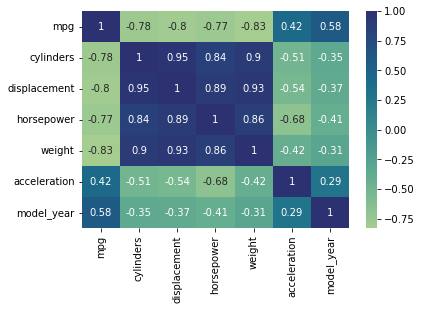

In [12]:
sns.heatmap(df.corr(),cmap='crest',annot=True)

In [13]:
df.drop(['cylinders','displacement','weight'],axis = 1, inplace=True)

In [14]:
df

,mpg,horsepower,acceleration,model_year,origin,name
0,18.0,130,12.0,70,usa,chevrolet chevelle malibu
1,15.0,165,11.5,70,usa,buick skylark 320
2,18.0,150,11.0,70,usa,plymouth satellite
3,16.0,150,12.0,70,usa,amc rebel sst
4,17.0,140,10.5,70,usa,ford torino
...,...,...,...,...,...,...
393,27.0,86,15.6,82,usa,ford mustang gl
394,44.0,52,24.6,82,europe,vw pickup
395,32.0,84,11.6,82,usa,dodge rampage
396,28.0,79,18.6,82,usa,ford ranger


In [15]:
df.drop('name', axis = 1, inplace=True)

In [16]:
df

,mpg,horsepower,acceleration,model_year,origin
0,18.0,130,12.0,70,usa
1,15.0,165,11.5,70,usa
2,18.0,150,11.0,70,usa
3,16.0,150,12.0,70,usa
4,17.0,140,10.5,70,usa
...,...,...,...,...,...
393,27.0,86,15.6,82,usa
394,44.0,52,24.6,82,europe
395,32.0,84,11.6,82,usa
396,28.0,79,18.6,82,usa


In [17]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [19]:
df['origin'] = label_encoder.fit_transform(df['origin'])

In [20]:
df.head()

,mpg,horsepower,acceleration,model_year,origin
0,18.0,130,12.0,70,2
1,15.0,165,11.5,70,2
2,18.0,150,11.0,70,2
3,16.0,150,12.0,70,2
4,17.0,140,10.5,70,2


In [21]:
df['origin'].unique()

array([2, 1, 0])

In [22]:
x = df.drop('mpg', axis = 1)
y = df['mpg']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()

In [25]:
model.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(x_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Mean Absolute Error (MAE): 2.81
Mean Squared Error (MSE): 13.51
R-squared (R²) Score: 0.75


In [28]:
ridge = Ridge(alpha=.01)
ridge.fit(x_train,y_train) 
ridge_pred = ridge.predict(x_test)

In [29]:
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f'Mean Absolute Error (MAE): {ridge_mae:.2f}')
print(f'Mean Squared Error (MSE): {ridge_mse:.2f}')
print(f'R-squared (R²) Score: {ridge_r2:.2f}')

Mean Absolute Error (MAE): 2.81
Mean Squared Error (MSE): 13.51
R-squared (R²) Score: 0.75


In [30]:
dt = DecisionTreeRegressor() 
params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}               

tree_search = GridSearchCV(dt,params,cv=5,n_jobs=-1) 

tree_search.fit(x_train,y_train)   

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [31]:
tree_pred = tree_search.predict(x_test)

In [32]:
dt_mae = mean_absolute_error(y_test, tree_pred)
dt_mse = mean_squared_error(y_test, tree_pred)
dt_r2 = r2_score(y_test, tree_pred)

print(f'Mean Absolute Error (MAE): {dt_mae:.2f}')
print(f'Mean Squared Error (MSE): {dt_mse:.2f}')
print(f'R-squared (R²) Score: {dt_r2:.2f}')

Mean Absolute Error (MAE): 2.50
Mean Squared Error (MSE): 9.95
R-squared (R²) Score: 0.81


In [33]:
rf = RandomForestRegressor()

# we add the n_estimators parameter in our previous parameter dictionary
params['n_estimators'] = [100,200,300,400,500]

rf_search = RandomizedSearchCV(rf,params,cv=5,n_jobs=-1,     # initialize the search
                                  n_iter=50)

rf_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [34]:
rf_pred = rf_search.predict(x_test)

In [35]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f'Mean Absolute Error (MAE): {rf_mae:.2f}')
print(f'Mean Squared Error (MSE): {rf_mse:.2f}')
print(f'R-squared (R²) Score: {rf_r2:.2f}')

Mean Absolute Error (MAE): 2.00
Mean Squared Error (MSE): 6.05
R-squared (R²) Score: 0.89


In [36]:
gradient = GradientBoostingRegressor()  # instantiate the model

# append a learning_rate parameter to the parameter dictionary
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]

gradient_search = RandomizedSearchCV(gradient,params,cv=5,n_jobs=-1,
                                  n_iter=50)   # initialize the search

gradient_search.fit(x_train,y_train)   # fit the model

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [37]:
gradient_pred = gradient_search.predict(x_test)

In [38]:
gm_mae = mean_absolute_error(y_test, gradient_pred)
gm_mse = mean_squared_error(y_test, gradient_pred)
gm_r2 = r2_score(y_test, gradient_pred)

print(f'Mean Absolute Error (MAE): {gm_mae:.2f}')
print(f'Mean Squared Error (MSE): {gm_mse:.2f}')
print(f'R-squared (R²) Score: {gm_r2:.2f}')

Mean Absolute Error (MAE): 2.08
Mean Squared Error (MSE): 6.85
R-squared (R²) Score: 0.87


In [39]:
y1_pred = rf_search.predict(x)

In [40]:
data = pd.DataFrame({'Actual mpg': y, 'Predicted mpg': y1_pred})

In [41]:
data

,Actual mpg,Predicted mpg
0,18.0,15.906019
1,15.0,14.953642
2,18.0,16.359995
3,16.0,15.114596
4,17.0,16.339710
...,...,...
393,27.0,30.532838
394,44.0,38.308536
395,32.0,32.739095
396,28.0,31.167018


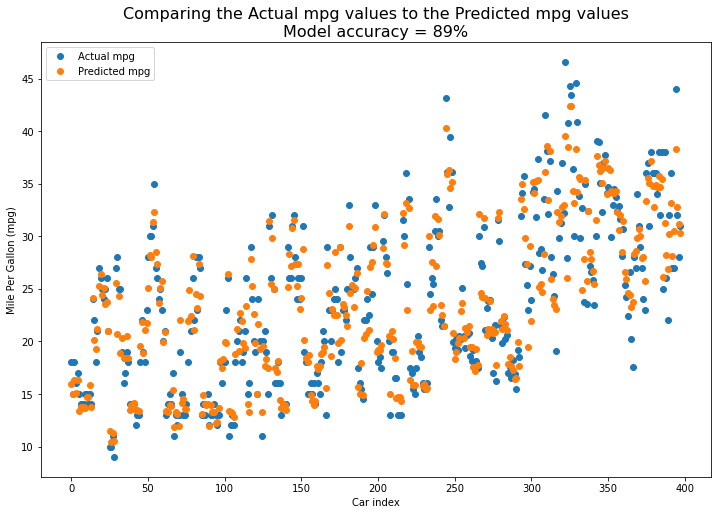

In [42]:
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comparing the Actual mpg values to the Predicted mpg values\nModel accuracy = 89%',
         fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()

In [43]:
data['Residuals'] = data['Actual mpg']-data['Predicted mpg']
data

,Actual mpg,Predicted mpg,Residuals
0,18.0,15.906019,2.093981
1,15.0,14.953642,0.046358
2,18.0,16.359995,1.640005
3,16.0,15.114596,0.885404
4,17.0,16.339710,0.660290
...,...,...,...
393,27.0,30.532838,-3.532838
394,44.0,38.308536,5.691464
395,32.0,32.739095,-0.739095
396,28.0,31.167018,-3.167018
